## Assignment 3: Text Classification
Introduction: Text classification is widely used, for instance for sorting news articles, deciding whether
mails are spam or for detecting offensive tweets.
Task: Perform text classification on the Reuters corpus. Try at least two different ways of text
preprocessing and compare the results. What can you conclude? Also include a short discussion on
possible improvements in your notebook. Upload a ipython notebook (.ipynb) with your solutions and also
a PDF (File → Download as → PDF via PDFLatex, in the ipython Notebooks.)

**By Cedric Omtzigt and Carlos de Bourbon group 96**

In [3]:
#general approach
#load the corpus
#split data in test and train 
#create labels for each category 
#transform into a DMT (multiple based on different tokenizers)
#train on train
#eval on test
#repeat above but now with stemming, lemminazation, itdf, normalization

In [4]:
#import nltk, sklearn
import nltk, sklearn
import regex as re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#load data
nltk.download('reuters')
from nltk.corpus import reuters
#grap an example doc.
reuters.raw("test/14882")

[nltk_data] Downloading package reuters to C:\Users\windows-game-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


"THAI ZINC EXPORTS FALL IN MARCH\n  Thai zinc ingot exports fell to 882\n  tonnes in March from 1,764 in February and 3,008 in March 1986,\n  the Mineral Resources Department said.\n      A spokesman for Padaeng Industry Co Ltd, the country's sole\n  exporter, attributed the decline to the company's lower stocks,\n  which averaged 5,000 tonnes in the first quarter against 16,000\n  tonnes in late 1985 when it began exporting.\n      The department said major buyers included China, Japan, the\n  Philippines, South Korea, Singapore and Taiwan.\n      Thailand exported 4,842 tonnes of zinc ingots during the\n  first quarter, down from 14,937 a year ago.\n  \n\n"

In [5]:
#test train split
trainset =[fileid for fileid in reuters.fileids() if len(re.findall("train",fileid))>0]
testset  =[fileid for fileid in reuters.fileids() if len(re.findall("test",fileid))>0]

X_train = [reuters.raw(id) for id in trainset]
X_test = [reuters.raw(id) for id in testset]

#convert first topic per document to numerical label
le = LabelEncoder()
all_categories = [reuters.categories(id)[0] for id in trainset + testset]
le.fit(all_categories)

y_train = [le.transform([reuters.categories(id)[0]]) for id in trainset]
y_test = [le.transform([reuters.categories(id)[0]]) for id in testset]

In [17]:
#text preprocessing functions passed as CountVectorizer tokenizer, each with different preprocessing steps

'''only remove stop words'''
def preprocessing_tokenizer_0(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


'''lowercase, stop word removal, stemming'''
def preprocessing_tokenizer_1(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return stemmed_tokens


'''lowercase, stop word and non-alphabetical character removal, stemming'''
def preprocessing_tokenizer_2(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return stemmed_tokens


'''lowercase, stop word and non-alphabetical character removal, lemmatization'''
def preprocessing_tokenizer_3(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words("english"))
    stemmed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return stemmed_tokens


pre_processors = [preprocessing_tokenizer_0, preprocessing_tokenizer_1, preprocessing_tokenizer_2, preprocessing_tokenizer_3]
results = []

for i, tokenizer in enumerate(pre_processors):

    vect = CountVectorizer(tokenizer=tokenizer, token_pattern=None)
    vect_tuned = CountVectorizer(tokenizer=tokenizer, min_df=2, max_df=0.6, token_pattern=None)
    vect_bigrams = CountVectorizer(tokenizer=tokenizer, ngram_range=(2, 2), token_pattern=None)

    for j, v in enumerate([vect, vect_tuned, vect_bigrams]):

        X_train_tdm = v.fit_transform(X_train)
        X_test_tdm = v.transform(X_test) 


        #classification
        nb = MultinomialNB(force_alpha=True)
        nb.fit(X_train_tdm, y_train)
        y_pred = nb.predict(X_test_tdm)
        accuracy = metrics.accuracy_score(y_test, y_pred)


        results.append((j, accuracy))

c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages

In [19]:
results = []

for i, tokenizer in enumerate(pre_processors):

    vect_standard = CountVectorizer(tokenizer=tokenizer, token_pattern=None)
    vect_tuned = CountVectorizer(tokenizer=tokenizer, min_df=2, max_df=0.6, token_pattern=None)
    vect_bigrams = CountVectorizer(tokenizer=tokenizer, ngram_range=(2, 2), token_pattern=None)

    vectorizers = [vect_standard, vect_tuned, vect_bigrams]

    for j, vect in enumerate(vectorizers):

        X_train_tdm = vect.fit_transform(X_train)
        X_test_tdm = vect.transform(X_test) 

        # Classification
        nb = MultinomialNB()
        nb.fit(X_train_tdm, y_train)
        y_pred = nb.predict(X_test_tdm)
        accuracy = metrics.accuracy_score(y_test, y_pred)

        # Storing tokenizer index, vectorizer index, and accuracy
        results.append((i, j, accuracy))

#print
for res in results:
    tokenizer_idx, vect_idx, acc = res
    print(f"Tokenizer {tokenizer_idx}, Vectorizer {vect_idx}: Accuracy = {acc:.2f}")


c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\windows-game-pc\AppData\Local\Programs\Python\Python311\Lib\site-packages

Tokenizer 0, Vectorizer 0: Accuracy = 0.79
Tokenizer 0, Vectorizer 1: Accuracy = 0.82
Tokenizer 0, Vectorizer 2: Accuracy = 0.80
Tokenizer 1, Vectorizer 0: Accuracy = 0.79
Tokenizer 1, Vectorizer 1: Accuracy = 0.82
Tokenizer 1, Vectorizer 2: Accuracy = 0.81
Tokenizer 2, Vectorizer 0: Accuracy = 0.81
Tokenizer 2, Vectorizer 1: Accuracy = 0.83
Tokenizer 2, Vectorizer 2: Accuracy = 0.83
Tokenizer 3, Vectorizer 0: Accuracy = 0.81
Tokenizer 3, Vectorizer 1: Accuracy = 0.83
Tokenizer 3, Vectorizer 2: Accuracy = 0.83


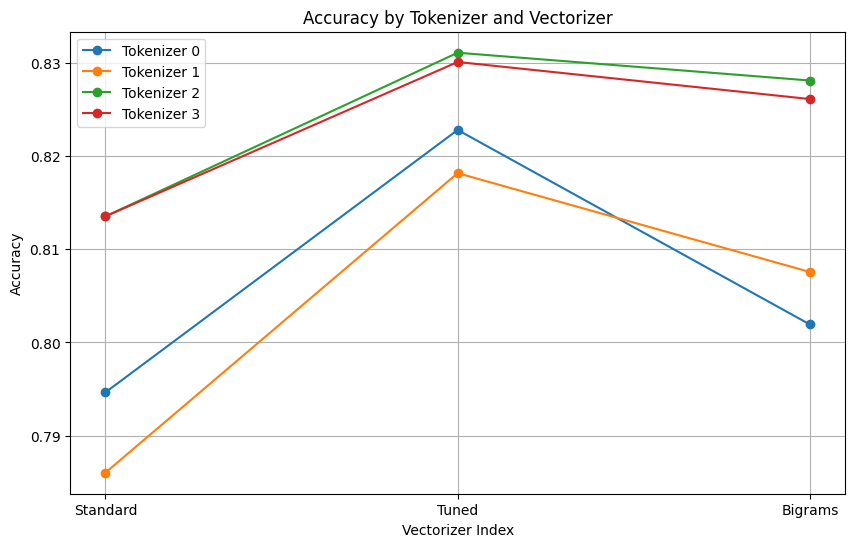

In [23]:
import matplotlib.pyplot as plt

plot_data = {f"Tokenizer {i}": [] for i in range(len(pre_processors))}
for i in range(len(pre_processors)):
    for j in range(len(vectorizers)):
        # Filter results for each tokenizer and vectorizer combination
        acc = [res[2] for res in results if res[0] == i and res[1] == j]
        if acc:
            plot_data[f"Tokenizer {i}"].append(acc[0])
        else:
            plot_data[f"Tokenizer {i}"].append(None)

# Plotting
plt.figure(figsize=(10, 6))
for tokenizer, accs in plot_data.items():
    plt.plot(range(len(vectorizers)), accs, marker='o', label=tokenizer)

plt.xlabel('Vectorizer Index')
plt.ylabel('Accuracy')
plt.title('Accuracy by Tokenizer and Vectorizer')
plt.xticks(range(len(vectorizers)), ['Standard', 'Tuned', 'Bigrams'])
plt.legend()
plt.grid(True)
# plt.show()  #uncomment to update graph

# Discussion

We compared several aspects of text preprocessing and vectorization, breaking it down into two main parts:

### Preprocessing at the Tokenization Step
We created four tokenizers, each represented by a different color:

- **0) Blue Line:** A baseline tokenizer that only removes stop words to keep the Term Document Matrix (TDM) size reasonable. This preprocessor performs second worst overall.
- **1) Orange:** This tokenizer normalizes text to lowercase and introduces Porter stemming. Curiously, it performs slightly worse than the baseline, only outperforming it when using bigrams.
- **2) Green:** Adds the removal of non-alphabetical characters. This tokenizer is the best performer for this classification task, indicating that numbers in the dataset negatively impact performance.
- **3) Red:** Swaps stemming for lemmatization. Its performance is almost on par with the green tokenizer.

### Vectorization Methods for Creating Term Document Matrices (Shown on the X-axis)
- **Standard Vectorizer:** A baseline method. No additional arguments were provided to the `CountVectorizer` other than a custom tokenizer.
- **Tuned Vectorizer:** Utilizes lower and upper bounds for word frequency.
- **Bigrams Vectorizer:** Uses only bigrams as terms in the matrix.

### Results
- The standard vectorizer performs the lowest of the three, suggesting that using bounds or n-grams improves classification performance. Tuning slightly outperforms bigrams.
- Overall, performance increases with smart filtering (removing numbers, applying min-max frequency, using bigrams, etc.) and decreases with lowercase normalization, likely due to the loss of information about named entities.

### Interesting Observations
- The standard tokenizer performs second worst in the standard and tuned configurations but worst in the bigram configuration.

### Resources: 
Examples on text classification and text pre-processing from Christin Seifert and Nils Witt https://github.com/n-witt/MachineLearningWithText_SS2017 

Generative AI use is minimal, however GPT was used to help generate the code for the visualization of the results using matplotlib.